# Programming Quantum Computers
- #### Hands-on Experiential Learning <font color="red">for the Software Engineer</font>

# Chapter Ch07_02
# <font color="red">Hands-on</font>:  <font color="blue">QFT of Simple QPU Signal</font> 
- #### Finding hidden frequencies within a signal

![QC_Programming-red](img/QC_Programming-red.png "QC_Programming-red")

<BR>
    
<font color="red">**Notice**</font>: All materials herein were created by **Matthew R. Versaggi (profversaggi@gmail.com)** and are released into the open source to foster growth and welfare of expanding the Quantum Computing domain - the only obligation one incurs when using, copying, distributing or referencing this is to kindly reference the author and send me an email so I know how useful the material is to you.

<font color="red">**Notice**</font>: Python Code contributions for the Circle Plots are the work of **David Radcliffe**.

## Pedagogical Approach: (<font color="red">**Read this first !**</font>)

This material is intended to educate **software engineers** in certain aspects of Quantum Computing, therefore its focus will be on conveying the conceptual ideas in a form digestible to them, and supporting it with exercises to reinforce those concepts. 

Because of that pedagogical approach, **this material won't lead with or heavily leverage the concepts and language indigenous to physics and math**, but only in those terms most easily digestible to the modern software engineer.

This Jupyter Notebook is <font color="red">**not intended as a stand alone educational vehicle**</font>  - it's meant to be accompanied by a decicated power point deck that contains the main concepts to be presented by an instructor - **it is intended as a vehicle for a hands on workshop environment to facilitate learning through a guided experience.**

> **Note:-** Because of the above educational approach:
1. There is a certain amount of basic Quantum Computing knowledge that is assumed.
2. An active internet connection is **always** assumed.
3. Online references/links will be provided where appropriate
4. References to books will be made where appropriate
5. Much of this material is **dense and detailed**, the reader is <font color="red">**cautioned**</font> to be careful and slow to digest the *nuances* of the material.

## What you will be exposed to - High level: 

- Software engineers in the Quantum Computing space need to **<font color="blue">gain a mastery of the simulation frameworks and tools used to understand and solve problems quantumly</font>**. Under the hood, the **<font color="red">simulators mathematically represent the "Ideal" manifestations of quantum hardware</font>** that (theoretically) the "Actual" quantum hardware would behave exactly like. For the software engineer, this is the preferred situation as it permits them to understand and solve problems w/out being bound to the limitations of the hardware as it matures.


- Given the above, there are a host of technical concepts that need to be **<font color="red">understood experientially</font>** - we'll intentionally employ a vendor / framework agnostic approach to focus on the delivery of concept understanding and intuition procurement as the main value-add.


## Accompanying Text:

<BR>

<a href="https://www.amazon.com/Programming-Quantum-Computers-Essential-Algorithms/dp/1492039683" target="_blank"><img src="img/OreillyBookImage-small.png" height="250" align=left style="padding:15px;"></a>


> The core materials leveraged in this Jupyter Notebook comes from the following book, and is required reading to engage in the problem sets covered.

> The problem sets contained here will be expanded versions of the exercises contained in the book for sake of gaining intuition about the particular concept in question through leveraging various 'other' frameworks, tools, and instruments indigenous to the quantum programming space. 


> The core idea is that the various "simulators" circuitry (underlying mathematical representations) is considered the "Ideal" at the time of this JNB's construction, and therefore are the bect tools we have to address the problems we are interested in. To avoid being constrained by any particular framework, tool set, and software instruments, the idea is to leverage a host of appropriate "tools" when addressing any particular concept, problem or issue to remaind technology agnostic, but concept and intuition rich.


- **Note:** The problems explored are organized and ordered according to chapter.

<BR>

**<font color="red" size=4>Notice</font>:** - Prior to embarking on this notebook the reader is **highly encouraged to procure a <font color="red" size=4>reasonable</font> <font color="blue" size=4>introduction</font>** to the following key programming (and circuit) frameworks used:

0. <a href="https://oreilly-qc.github.io/" target="_blank"><font color="blue" size=4>QCEngine</font></a>
0. <a href="https://qiskit.org/textbook/preface.html" target="_blank"><font color="blue" size=4>Qiskit Tutorial</font></a>, <a href="https://qiskit.org/" target="_blank"><font color="blue" size=4>Qiskit Home</font></a>
0. <a href="https://algassert.com/quirk" target="_blank"><font color="blue">QUIRK</font></a>

# <font color="red">Example Problem(s):</font> 

**This example problem is archetypal** of how the exercises highlighted in the book can be expanded to include a host of other tools that help build understanding and intuition of the concepts being explored. 

- The <font color="blue">QCEngine</font> is a staple, but the <font color="blue">Bloch Sphere Playground Application</font>, the <font color="blue">Quantum Gate Playground</font>, <font color="blue">QUIRK</font>, and <font color="blue">Qiskit</font> are also instructive to leverage when persuing intuition about the concept and will be often used.

![QFT](img/QFT-circuit-1.png "QFT")

<BR>
    
![QFT](img/QFT-frequencies-signal.png "QFT")
>> - #### Finding hidden frequencies within a signal
<BR>
    
![QFT](img/QFT-explanation.png "QFT")

>> - ### This is the key idea of QFT. 
- A **READ** of the circuit verifies this.

#### <font color="blue">Circuit Implementation</font> - the below example implements the above circuit.
- **Copy and Run** the code base below and **step** through the circuit to gain intuition about its behavior.
- **Observe** the resulting circle charts as you step through the circuit and compare them to the reference diagram above to convince yourself that want is happening is what is expected. **Take note of the phase changes from start to finish.**
- **Use** this codebase as inspiration for the **homework.**

> ### <font color="red">Full Screen Mode</font>:

> - https://oreilly-qc.github.io?p=7-2

# <font color="blue">QCEngine</font>

In [1]:
from IPython.display import IFrame
IFrame(src='https://oreilly-qc.github.io?p=7-2', width=900, height=900)

# <font color="blue">Qiskit</font> Example

- Execute the circuit below, albit its broken up into its compoment parts.


### <font color="blue">Setup and Q_Circuit Design</font>

In [3]:
## Programming Quantum Computers
##   by Eric Johnston, Nic Harrigan and Mercedes Gimeno-Segovia
##   O'Reilly Media
##
## More samples like this can be found at http://oreilly-qc.github.io
##
## A complete notebook of all Chapter 6 samples (including this one) can be found at
##  https://github.com/oreilly-qc/oreilly-qc.github.io/tree/master/samples/Qiskit

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
import math
## Uncomment the next line to see diagrams when running in a notebook
#%matplotlib inline

## Example 7-2: QFT of simple QPU signal

# Set up the program
signal = QuantumRegister(4, name='signal')
qc = QuantumCircuit(signal)


### <font color="blue">Define Main FN, Circuit Prep and execute the </font> **<font color="red">QFT</font>**  Subroutines

In [4]:
def main():
    
    ## prepare the signal
    qc.h(signal);
    qc.rz(math.radians(45), signal[0]);
    qc.rz(math.radians(90), signal[1]);
    qc.rz(math.radians(180), signal[2]);

    qc.barrier()
    QFT(signal)

### <font color="blue">Define the </font> **<font color="red">QFT</font>**  Subroutines
- It is instructive to interrogate this code

In [5]:
def QFT(qreg):
    
    ## This QFT implementation is adapted from IBM's sample:
    ##   https://github.com/Qiskit/qiskit-terra/blob/master/examples/python/qft.py
    ## ...with a few adjustments to match the book QFT implementation exactly
    
    n = len(qreg)
    for j in range(n):
        for k in range(j):
            qc.cu1(-math.pi/float(2**(j-k)), qreg[n-j-1], qreg[n-k-1])
        qc.h(qreg[n-j-1])
    
    # Now finish the QFT by reversing the order of the qubits
    for j in range(n//2):
        qc.swap(qreg[j], qreg[n-j-1])


### <font color="blue">Execute Main FN </font>

In [6]:
main()

### <font color="blue">Submit the Job to the SImulator Backend </font>

In [7]:
## That's the program. Everything below runs and draws it.

backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()


### <font color="blue">Printout Quantum Registers and Circuit</font>

> **<font color="red">Notice</font>**: the specific KET whose **magnitude** stands out from the rest.
- This is the **Signal Frequency** contained inside the QPU Register **=** <font color="blue">the # times the Relative Phases rotate back to the ZERO position</font>.

In [8]:
outputstate = result.get_statevector(qc, decimals=3)
for i,amp in enumerate(outputstate):
    if abs(amp) > 0.000001:
        prob = abs(amp) * abs(amp)
        print('|{}> {} probability = {}%'.format(i, amp, round(prob * 100, 5)))


|2> (1-0j) probability = 100.0%


### <font color="blue">Print out the QISKIT Circle Plots for intuition </font>
- The font is a bit small, but you can verify with a simple count of the circles.

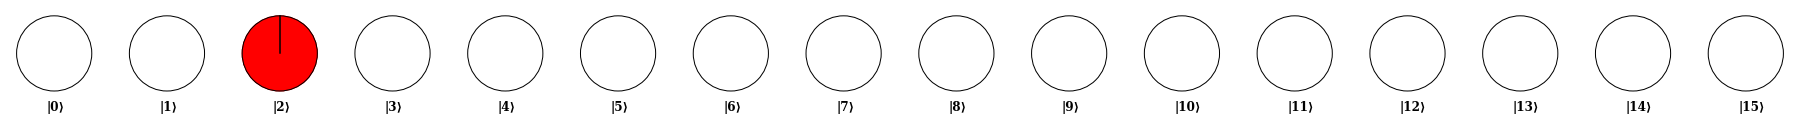

In [9]:
from circle_plot import *
plot_circles(outputstate)

### <font color="blue">Print Bloch Spheres for intuition </font>
- Note the **phase change** of each as we **encode information and calculate** using **phases**.

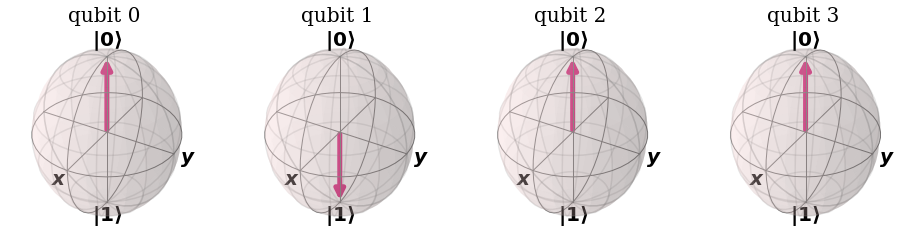

In [10]:
# Plot the state vector on a Bloch sphere

from qiskit.tools.visualization import plot_bloch_multivector
plot_bloch_multivector(outputstate)

### <font color="blue">Draw the Circuit </font>

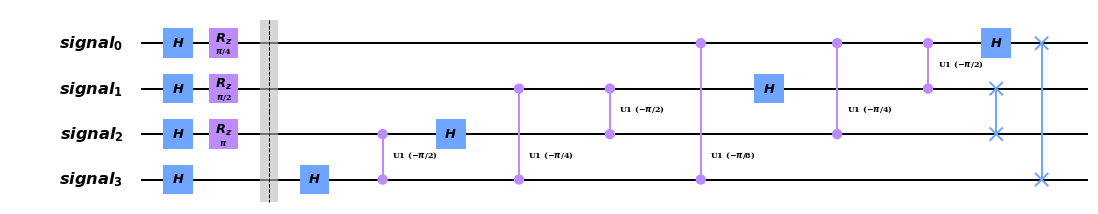

In [11]:
# qc.draw()        # draw the circuit
qc.draw(output='mpl')        # draw the circuit

# <font color="red">Graded Exercises</font>  for use <font color="blue">with structured courses.</font>
> #### In the previous QCEngine / Qiskit example(s), you explored the circuit described below.

![QFT](img/QFT-circuit-1.png "QFT")

<BR>
    
![QFT](img/QFT-frequencies-signal.png "QFT")
>> - #### Finding hidden frequencies within a signal
<BR>
    
![QFT](img/QFT-explanation.png "QFT")

>> - ### This is the key idea of QFT.

#### <font color="blue">Question #1 </font>

<BR>
    
> ### Given the above as inspiration, explore the following line of inquiry in **<font color="red">only</font> QCEngine** :

- Make the following alternations to the variable **num_qubits** in the QCEngine codebase, run it and **notice the frequency change** in the output of the circuit.


0.  var num_qubits = 5,6,7,8;

Given what you've learned in **Ch 6 & Ch7** so far, <font color="red">describe</font> what accounts for that change in frequency change hidden inside the signal when the qubits increase.

#### <font color="black">Answer #1 </font>:

#### <font color="blue">Question #2 </font>

<BR>
    
> ### Given the above as inspiration, explore the following line of inquiry in **<font color="red">only</font> QCEngine** :

- Keep the num_qubits at 4, and **add** the following to the end of the Signal Prep segment of the codebase:

> **signal.phase(270, 8);**

- What is the resultant frequency change in the circuit now?
- Describe why that is so.


#### <font color="black">Answer #2 </font>:

![the-end](img/the-end.png "the-end")